## Capstone Project: tbc

### 1. Introduction

The aim of this project was to segment London using the most common venues in each area and compare it with the average home prices in the same area to understand if there is a relationship between the type and frequency of venues and home prices.

### 2. Data Description

Three datasets will be used:
    1. Venues and places data from Foursquare 
    2. London's average home prices per area from London DataStore
    3. London's neighbourhoods Coordinates from London DataStore

### 3.Data Fetching and Analysis

In [4]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import folium 

In [22]:
#Download dataset 1: London's neighborhood's coordinates
!wget -q -O 'UKPostcodesCSV.csv' https://www.doogal.co.uk/UKPostcodesCSV.ashx?region=E12000007
print('Data downloaded!')

Data downloaded!


In [194]:
dataset1_areas=pd.read_csv('UKPostcodesCSV.csv', encoding = "ISO-8859-1")
dataset1_areas.head()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,District Code,Ward Code,Country,County Code,Constituency,Introduced,Terminated,Parish,National Park,Population,Households,Built up area,Built up sub-division,Lower layer super output area,Rural/urban,Region,Altitude,London zone,LSOA Code,Local authority,MSOA Code,Middle layer super output area,Parish Code,Census output area,Constituency Code,Index of Multiple Deprivation,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Water company,Plus Code,Average Income
0,BR1 1AA,Yes,51.401546,0.015415,540291,168873,TQ402688,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2016-05-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,71,5,E01000675,NaN,E02000144,Bromley 018,E43000196,E00003264,E14000604,24305,1,0,2020-02-19,Bromley South,0.218257,BR,BR1,Metropolitan Police,Thames Water,9F32C228+J5,63100
1,BR1 1AB,Yes,51.406333,0.015208,540262,169405,TQ402694,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2012-03-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 008B,Urban major conurbation,London,71,4,E01000676,NaN,E02000134,Bromley 008,E43000196,E00003255,E14000604,13716,1,0,2020-02-19,Bromley North,0.253666,BR,BR1,Metropolitan Police,Thames Water,9F32C248+G3,56100
2,BR1 1AD,No,51.400057,0.016715,540386,168710,TQ403687,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2014-09-01,2017-09-01,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,53,5,E01000675,NaN,E02000144,Bromley 018,E43000196,E00003264,E14000604,24305,1,1,2020-02-19,Bromley South,0.044559,BR,BR1,Metropolitan Police,NaN,9F32C228+2M,63100
3,BR1 1AE,Yes,51.404543,0.014195,540197,169204,TQ401692,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2008-08-01,NaN,"Bromley, unparished area",NaN,34.0,21.0,Greater London,Bromley,Bromley 018C,Urban major conurbation,London,71,4,E01000677,NaN,E02000144,Bromley 018,E43000196,E00003266,E14000604,20694,1,0,2020-02-19,Bromley North,0.462939,BR,BR1,Metropolitan Police,Thames Water,9F32C237+RM,63100
4,BR1 1AF,Yes,51.401392,0.014948,540259,168855,TQ402688,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2015-05-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,58,5,E01000675,NaN,E02000144,Bromley 018,E43000196,E00003264,E14000604,24305,1,0,2020-02-19,Bromley South,0.227664,BR,BR1,Metropolitan Police,Thames Water,9F32C227+HX,63100


In [294]:
# group and select relevant data only - neighborhood name and coordinates
ldn_areas= dataset1_areas.groupby('District').mean().reset_index()
ldn_areas = ldn_areas[['District', 'Latitude', 'Longitude']]
ldn_areas = ldn_areas.rename(columns={"District": "Area"})
ldn_areas.head()

,Area,Latitude,Longitude
0,Barking and Dagenham,51.546468,0.124998
1,Barnet,51.605532,-0.207715
2,Bexley,51.459171,0.136321
3,Brent,51.551800,-0.257501
4,Bromley,51.391800,0.026393


In [297]:
#Download dataset 2: home prices data
!wget -q -O 'land-registry-house-prices-borough.csv' https://data.london.gov.uk/download/average-house-prices/b1b0079e-698c-4c0b-b8c7-aa6189590ca4/land-registry-house-prices-borough.csv
dataset2_prices=pd.read_csv('land-registry-house-prices-borough.csv', encoding = "ISO-8859-1")
dataset2_prices.head()

,Code,Area,Year,Measure,Value
0,E09000001,City of London,Year ending Dec 1995,Median,"105,000"
1,E09000002,Barking and Dagenham,Year ending Dec 1995,Median,"49,000"
2,E09000003,Barnet,Year ending Dec 1995,Median,"85,125"
3,E09000004,Bexley,Year ending Dec 1995,Median,"62,000"
4,E09000005,Brent,Year ending Dec 1995,Median,"68,000"


In [301]:
#slice data and get average prices for latest recorded year - Dec 2017
ldn_prices=dataset2_prices[dataset2_prices.Year == 'Year ending Dec 2017'][dataset2_prices.Measure == 'Mean' ]
ldn_prices.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Code,Area,Year,Measure,Value
7965,E09000001,City of London,Year ending Dec 2017,Mean,"950,760"
7966,E09000002,Barking and Dagenham,Year ending Dec 2017,Mean,"301,518"
7967,E09000003,Barnet,Year ending Dec 2017,Mean,"667,593"
7968,E09000004,Bexley,Year ending Dec 2017,Mean,"357,779"
7969,E09000005,Brent,Year ending Dec 2017,Mean,"578,705"


In [302]:
#Drop unnecessary columns and rows
ldn_prices = ldn_prices.drop(['Code', 'Year', 'Measure'], axis =1).reset_index()
ldn_prices = ldn_prices.drop(ldn_prices.index[33:45])

#check all neighborhood names from dataset1 are available in dataset 2
ldn_prices['Area'].isin(ldn_areas['Area'])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
Name: Area, dtype: bool

In [303]:
ldn_prices= ldn_prices.drop(['index'], axis = 1) #drop orignal index column
ldn_prices['Value'] = ldn_prices['Value'].replace(',', '', regex = True).astype('int64') # convert data in Value column to float

ldn_prices.head()

,Area,Value
0,City of London,950760
1,Barking and Dagenham,301518
2,Barnet,667593
3,Bexley,357779
4,Brent,578705


In [319]:
# merge prices data with neighborhood and coordinates dataset
ldn_df = pd.merge(ldn_areas, ldn_prices, on='Area' )
ldn_df.head()

,Area,Latitude,Longitude,Value
0,Barking and Dagenham,51.546468,0.124998,301518
1,Barnet,51.605532,-0.207715,667593
2,Bexley,51.459171,0.136321,357779
3,Brent,51.551800,-0.257501,578705
4,Bromley,51.391800,0.026393,502623


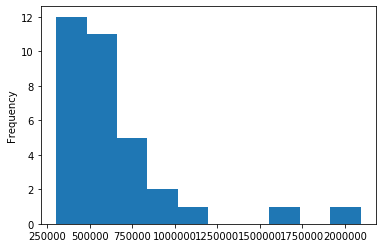

In [320]:
import seaborn as sns
ldn_df['Value'].plot(kind='hist')

In [305]:
ldn_df['Value'].describe()

count    3.300000e+01
mean     6.654116e+05
std      3.725934e+05
min      3.015180e+05
25%      4.599220e+05
50%      5.739380e+05
75%      6.839870e+05
max      2.092485e+06
Name: Value, dtype: float64

In [429]:
# classify areas based on average home prices
rlabels = ['5', '4', '3', '2', '1']
ldn_df['Price Cat'] = pd.qcut(ldn_df['Value'], q=[0, .25, .5, .75, .95, 1],
                              labels=rlabels)
ldn_df.sort_values(by='Value', ascending = False)

,Area,Latitude,Longitude,Value,Price Cat
19,Kensington and Chelsea,51.498517,-0.187363,2092485,1
32,Westminster,51.513203,-0.148677,1718124,1
5,Camden,51.534370,-0.143292,1099876,2
12,Hammersmith and Fulham,51.492079,-0.216469,972231,2
6,City of London,51.514287,-0.091435,950760,2
26,Richmond upon Thames,51.449029,-0.316954,819044,2
31,Wandsworth,51.455802,-0.176793,818443,2
18,Islington,51.538980,-0.108733,778290,2
13,Haringey,51.589738,-0.105810,683987,3
1,Barnet,51.605532,-0.207715,667593,3


In [430]:
#Fetch dataset 3 from Foursquare for London's venues/ common places

CLIENT_ID = 'SE3W4VIYSK5Z5S025FOMYVKPO0DNPVGINXFM2BSFGAJ543EY' # your Foursquare ID
CLIENT_SECRET = 'SWT3AANZ4LCBMCE5WLT25DEYPI4YUGBBIJ4COBS0CWLK2SO4' # your Foursquare Secret
VERSION = '20180620' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SE3W4VIYSK5Z5S025FOMYVKPO0DNPVGINXFM2BSFGAJ543EY
CLIENT_SECRET:SWT3AANZ4LCBMCE5WLT25DEYPI4YUGBBIJ4COBS0CWLK2SO4


In [433]:
#function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [434]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [435]:
ldn_venues = getNearbyVenues(names=ldn_areas['Area'],
                                   latitudes=ldn_df['Latitude'],
                                   longitudes=ldn_df['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
City of London
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


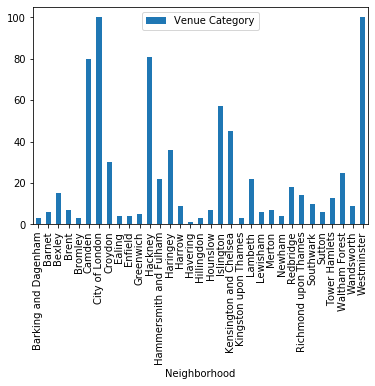

In [436]:
#visualise areas with the highest number of places
plt1 = ldn_venues.groupby('Neighborhood').count().reset_index()
plt1 = plt1[['Neighborhood','Venue Category']]
plt1.plot(kind='bar', x= 'Neighborhood', y= 'Venue Category')

In [437]:
# one hot encoding
ldn_onehot = pd.get_dummies(ldn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ldn_onehot['Neighborhood'] = ldn_venues['Neighborhood'] 


# move neighborhood column to the first column
fixed_columns = [ldn_onehot.columns[-1]] + list(ldn_onehot.columns[:-1])
ldn_onehot = ldn_onehot[fixed_columns]

ldn_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Food Court,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Halal Restaurant,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Lake,Latin American Restaurant,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Optical Shop,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Tram Station,Tree,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yakitori Restaurant,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Barnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [438]:
ldn_grouped = ldn_onehot.groupby('Neighborhood').mean().reset_index()

In [439]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [451]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ldn_grouped['Neighborhood']

for ind in np.arange(ldn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ldn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Park,Construction & Landscaping,Home Service,Yoga Studio,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field
1,Barnet,Gym / Fitness Center,Supermarket,Gas Station,Metro Station,Bakery,Grocery Store,Farm,Fried Chicken Joint,French Restaurant,Food Court
2,Bexley,Pub,Recreation Center,Bar,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Supermarket,Bowling Alley,Thrift / Vintage Store,Mexican Restaurant
3,Brent,Scandinavian Restaurant,Furniture / Home Store,Supermarket,Portuguese Restaurant,Sandwich Place,Fast Food Restaurant,Event Space,French Restaurant,Food Court,Fish & Chips Shop
4,Bromley,Gym / Fitness Center,Park,Soccer Stadium,Fruit & Vegetable Store,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market


In [452]:
from sklearn.cluster import KMeans
    
# set number of clusters
k = 6

ldn_grouped_clustering = ldn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state= 0).fit(ldn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1,
       2, 5, 2, 1, 2, 2, 2, 0, 1, 2, 1], dtype=int32)

In [442]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ldn_clus = ldn_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ldn_clus = ldn_clus.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Area')

ldn_clus.head()

,Area,Latitude,Longitude,Value,Price Cat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Barking and Dagenham,51.546468,0.124998,301518,5,0,Park,Construction & Landscaping,Home Service,Yoga Studio,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Event Space,Furniture / Home Store,English Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dive Bar
1,Barnet,51.605532,-0.207715,667593,3,1,Gym / Fitness Center,Supermarket,Gas Station,Metro Station,Bakery,Grocery Store,Farm,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Yoga Studio,Furniture / Home Store,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
2,Bexley,51.459171,0.136321,357779,5,1,Pub,Recreation Center,Bar,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Supermarket,Bowling Alley,Thrift / Vintage Store,Mexican Restaurant,Italian Restaurant,American Restaurant,Vietnamese Restaurant,Indian Restaurant,French Restaurant,Fish & Chips Shop,Field,Farmers Market,Farm,Falafel Restaurant
3,Brent,51.551800,-0.257501,578705,3,1,Scandinavian Restaurant,Furniture / Home Store,Supermarket,Portuguese Restaurant,Sandwich Place,Fast Food Restaurant,Event Space,French Restaurant,Food Court,Fish & Chips Shop,Field,Farmers Market,Farm,Falafel Restaurant,Electronics Store,English Restaurant,Fruit & Vegetable Store,Dumpling Restaurant,Donut Shop,Dive Bar
4,Bromley,51.391800,0.026393,502623,4,0,Gym / Fitness Center,Park,Soccer Stadium,Fruit & Vegetable Store,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Yoga Studio,Event Space,English Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dive Bar,Distillery


In [444]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors
latitude = 51.5074 
longitude = -0.1278
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ldn_clus['Latitude'], ldn_clus['Longitude'], ldn_clus['Area'], ldn_clus['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [428]:
ldn_clus[ldn_clus['Cluster Labels'] ==0]

,Area,Latitude,Longitude,Value,Price Cat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Barking and Dagenham,51.546468,0.124998,301518,5,0,Park,Construction & Landscaping,Home Service,Yoga Studio,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Event Space,Furniture / Home Store,English Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dive Bar
4,Bromley,51.391800,0.026393,502623,4,0,Gym / Fitness Center,Park,Soccer Stadium,Fruit & Vegetable Store,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Yoga Studio,Event Space,English Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dive Bar,Distillery
8,Ealing,51.518032,-0.324967,578110,3,0,Train Station,Park,Tennis Court,Shop & Service,Event Space,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Yoga Studio,Fruit & Vegetable Store,English Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dive Bar
29,Tower Hamlets,51.517782,-0.043682,554009,4,0,Park,Fried Chicken Joint,Turkish Restaurant,Sandwich Place,Grocery Store,Farm,Bakery,Thai Restaurant,Italian Restaurant,Hotel,Fast Food Restaurant,Event Space,Field,Farmers Market,Fish & Chips Shop,Food Court,Falafel Restaurant,Yoga Studio,Electronics Store,English Restaurant


In [445]:
ldn_clus[ldn_clus['Cluster Labels'] ==1]

,Area,Latitude,Longitude,Value,Price Cat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
1,Barnet,51.605532,-0.207715,667593,3,1,Gym / Fitness Center,Supermarket,Gas Station,Metro Station,Bakery,Grocery Store,Farm,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Yoga Studio,Furniture / Home Store,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
2,Bexley,51.459171,0.136321,357779,5,1,Pub,Recreation Center,Bar,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Supermarket,Bowling Alley,Thrift / Vintage Store,Mexican Restaurant,Italian Restaurant,American Restaurant,Vietnamese Restaurant,Indian Restaurant,French Restaurant,Fish & Chips Shop,Field,Farmers Market,Farm,Falafel Restaurant
3,Brent,51.551800,-0.257501,578705,3,1,Scandinavian Restaurant,Furniture / Home Store,Supermarket,Portuguese Restaurant,Sandwich Place,Fast Food Restaurant,Event Space,French Restaurant,Food Court,Fish & Chips Shop,Field,Farmers Market,Farm,Falafel Restaurant,Electronics Store,English Restaurant,Fruit & Vegetable Store,Dumpling Restaurant,Donut Shop,Dive Bar
5,Camden,51.534370,-0.143292,1099876,2,1,Coffee Shop,Greek Restaurant,Japanese Restaurant,Pizza Place,Park,Italian Restaurant,Pub,Burger Joint,Bar,Supermarket,Sushi Restaurant,Tea Room,Beer Bar,Music Venue,Bakery,Cocktail Bar,Middle Eastern Restaurant,Grocery Store,Deli / Bodega,Pharmacy
6,City of London,51.514287,-0.091435,950760,2,1,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Wine Bar,Clothing Store,Seafood Restaurant,Restaurant,Steakhouse,French Restaurant,Hotel,Juice Bar,Modern European Restaurant,Boutique,Indian Restaurant,Roof Deck,Sandwich Place,Scenic Lookout,Café,Burrito Place,Cocktail Bar
7,Croydon,51.368197,-0.096495,399645,5,1,Pub,Mediterranean Restaurant,Italian Restaurant,Indian Restaurant,Bar,Seafood Restaurant,Coffee Shop,Concert Hall,Park,Bistro,Fast Food Restaurant,French Restaurant,Spanish Restaurant,Train Station,Gaming Cafe,Restaurant,Pizza Place,Museum,Music Store,Ice Cream Shop
9,Enfield,51.639907,-0.082701,463806,4,1,Indian Restaurant,Tennis Court,Garden,Pizza Place,Discount Store,Farmers Market,Dim Sum Restaurant,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Diner,Field,Fast Food Restaurant,Farm,Distillery,Falafel Restaurant,Furniture / Home Store,Event Space,English Restaurant
11,Hackney,51.549614,-0.069847,614955,3,1,Turkish Restaurant,Cocktail Bar,Pub,Café,Coffee Shop,Restaurant,Bar,Grocery Store,Pizza Place,Nightclub,Mediterranean Restaurant,Jazz Club,Hotel,Convenience Store,Yoga Studio,Breakfast Spot,Clothing Store,Karaoke Bar,Record Shop,Bakery
12,Hammersmith and Fulham,51.492079,-0.216469,972231,2,1,Café,Hotel,Pub,Cocktail Bar,Coffee Shop,Gym,Grocery Store,Bus Stop,Bakery,Bar,Sandwich Place,Gym / Fitness Center,Thai Restaurant,Italian Restaurant,Discount Store,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
13,Haringey,51.589738,-0.105810,683987,3,1,Café,Women's Store,Clothing Store,Fast Food Restaurant,Coffee Shop,Pharmacy,Sandwich Place,Bus Stop,Bulgarian Restaurant,Supermarket,Park,Mediterranean Restaurant,Optical Shop,Metro Station,Cosmetics Shop,Middle Eastern Restaurant,Malay Restaurant,Bookstore,Pub,Restaurant


In [446]:
ldn_clus[ldn_clus['Cluster Labels'] ==2]

,Area,Latitude,Longitude,Value,Price Cat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
10,Greenwich,51.476668,0.051810,462820,4,2,Bus Stop,Stationery Store,Soccer Field,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Yoga Studio,Event Space,English Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dive Bar,Distillery
22,Lewisham,51.452592,-0.024830,475142,4,2,Indian Restaurant,Pub,Park,Café,Athletics & Sports,Tree,Farm,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Event Space,Falafel Restaurant,Furniture / Home Store,English Restaurant,Electronics Store,Dumpling Restaurant
24,Newham,51.531290,0.030812,409477,5,2,Café,Market,Pub,Yoga Studio,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Furniture / Home Store,Event Space,English Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dive Bar
26,Richmond upon Thames,51.449029,-0.316954,819044,2,2,Café,Park,Gastropub,Boat or Ferry,Garden,Playground,Historic Site,Beer Garden,Bus Stop,Art Gallery,Fish & Chips Shop,Fruit & Vegetable Store,Distillery,Fried Chicken Joint,Dive Bar,Donut Shop,French Restaurant,Food Court,English Restaurant,Electronics Store
27,Southwark,51.483583,-0.078566,641210,3,2,Café,Pub,Building,Garden,Park,Convenience Store,Lake,Bus Stop,Photography Studio,Yoga Studio,Fast Food Restaurant,French Restaurant,Food Court,Fish & Chips Shop,Field,Farm,Farmers Market,Falafel Restaurant,Event Space,English Restaurant
28,Sutton,51.364229,-0.181871,402121,5,2,Pub,Bar,Park,Café,Grocery Store,Farm,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Yoga Studio,Furniture / Home Store,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Dumpling Restaurant
31,Wandsworth,51.455802,-0.176793,818443,2,2,Café,Bus Stop,Grocery Store,Park,Pub,Garden Center,Gastropub,Pizza Place,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Yoga Studio,Farm,French Restaurant,Event Space,English Restaurant,Electronics Store,Dumpling Restaurant


In [447]:
ldn_clus[ldn_clus['Cluster Labels'] ==3]

,Area,Latitude,Longitude,Value,Price Cat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
16,Hillingdon,51.537793,-0.438383,452272,5,3,Sporting Goods Shop,Construction & Landscaping,Playground,Yoga Studio,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Event Space,Dessert Shop,English Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dive Bar


In [448]:
ldn_clus[ldn_clus['Cluster Labels'] ==4]

,Area,Latitude,Longitude,Value,Price Cat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
15,Havering,51.570939,0.203535,387535,5,4,Park,Yoga Studio,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Event Space,Furniture / Home Store,English Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dive Bar,Distillery,Discount Store


In [449]:
ldn_clus[ldn_clus['Cluster Labels'] ==5]

,Area,Latitude,Longitude,Value,Price Cat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
23,Merton,51.411093,-0.196325,638519,3,5,Tram Station,Pizza Place,Pub,Park,Event Space,French Restaurant,Food Court,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Yoga Studio,Fruit & Vegetable Store,English Restaurant,Electronics Store,Dumpling Restaurant,Donut Shop,Dive Bar
